In [123]:
#Importar o datset
import pandas as pd
student = pd.read_csv('data/student-por.csv', sep=';')
len(student)

649

In [124]:
#gerando rotulo binario (pass/fail) baseado em G1+G2+G3 (notas dos testes de 0-20); para passar sum>=30 dd
student['pass'] = student.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
student = student.drop(['G1', 'G2', 'G3'], axis=1)
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [125]:
student = pd.get_dummies(student, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [126]:
# Convertendo qualquer booleano para inteiro, se necessário
for col in student.columns:
    if student[col].dtype == bool:
        student[col] = student[col].astype(int)

student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [127]:
#Suffle rows (embaralhando as linhas)
student = student.sample(frac=1)

#Split training and testing data: 500 primeiras linhas para treino e as restantes 149 para teste
student_train = student[:500]
student_test = student[500:]

student_train_att = student_train.drop(['pass'], axis=1)
student_train_pass = student_train['pass']

student_test_att = student_test.drop(['pass'], axis=1)
student_test_pass = student_test['pass']

student_att = student.drop(['pass'], axis=1)
student_pass = student['pass']

#Number of passing students in whole dataset
import numpy as np
print("Passing: %s out of %s (%2f%%)" % (np.sum(student_pass), len(student_pass), 100*float(np.sum(student_pass))/len(student_pass)))

Passing: 328 out of 649 (50.539291%)


In [128]:
#fit a decision tree 
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5) 
decisionTree = decisionTree.fit(student_train_att, student_train_pass)
print(decisionTree)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [129]:
#Save tree in .dot file named student-performance.dot
tree.export_graphviz(
    decisionTree,
    out_file="student-performance.dot",  # Corrigido o nome do arquivo
    label="all",
    impurity=False,
    proportion=True,
    feature_names=list(student_train_att),
    class_names=["fail", "pass"],
    filled=True,
    rounded=True  # Corrigido o valor, deve ser um booleano
)

In [130]:
decisionTree.score(student_test_att, student_test_pass)

0.6845637583892618

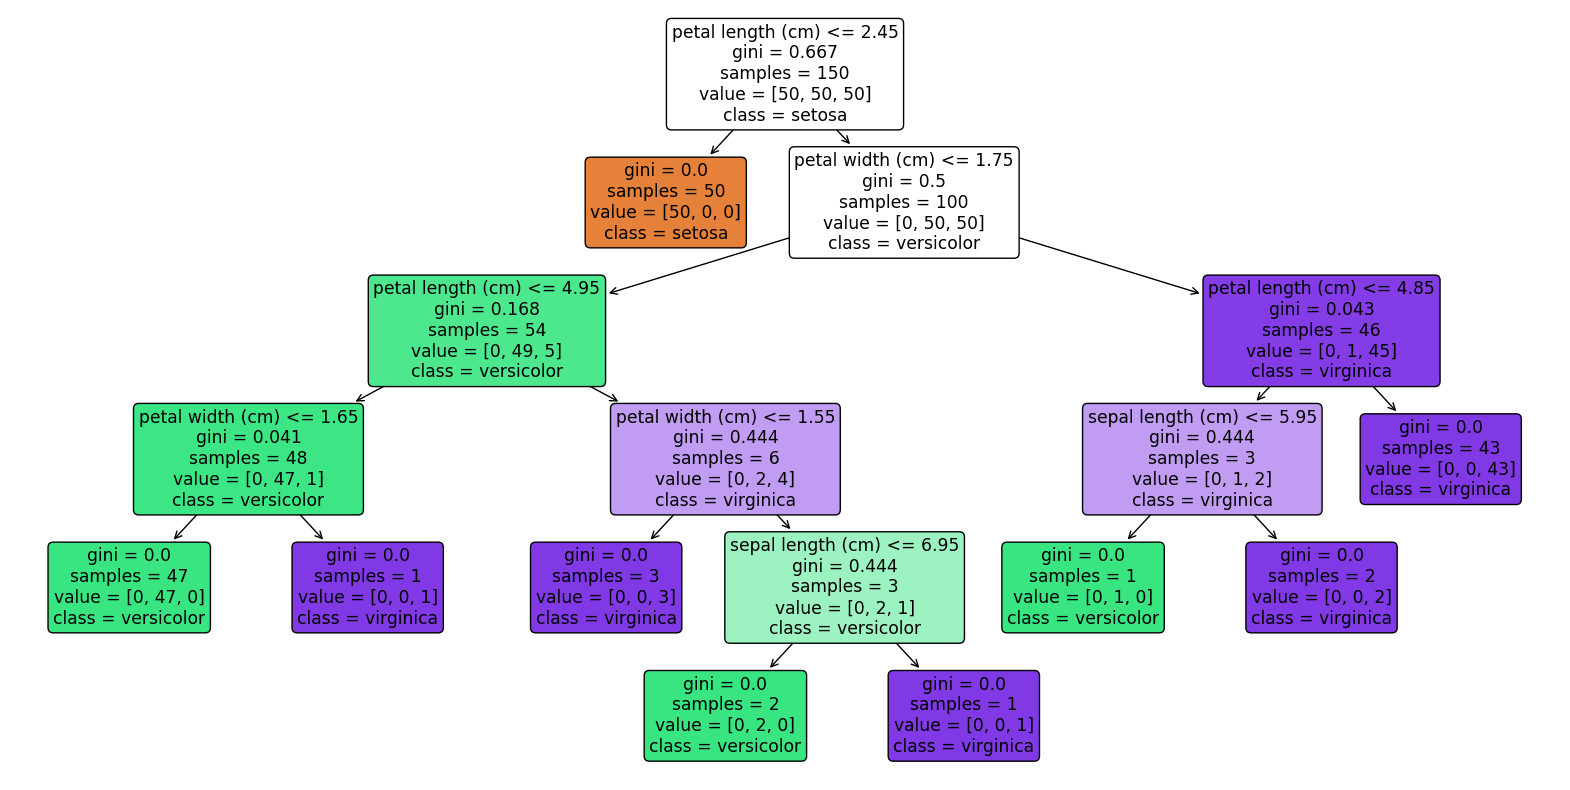

In [131]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Carregando dados de exemplo
iris = load_iris()
X, y = iris.data, iris.target

# Treinando um classificador
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X, y)

# Plotando a árvore de decisão usando matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(decisionTree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()
